# Redecorating a CG structure with atomistic building blocks

Here, we will show the redecorating functionality. A coarse-grained representation is redecorated with molecular atomistic building blocks. Multiple ways to do this by partitioning the building blocks into a linker region and/or a core region.

In [1]:
from cgf.utils.redecorate import redecorate_cg_atoms
from cgf.cgatoms import read_cgatoms

from pathlib import Path
import matplotlib.pyplot as plt

from ase.io import read
from ase.visualize.plot import plot_atoms


In [2]:
cg_atoms = read_cgatoms(Path('../example2/cg_atoms_MikadoRR.json'))

## Option 1: Only with linkermol

Here, we only use a linker building block. This will be rotated correctly and bent according to the elastic beam. It will be placed at a distance from the core-center which is the `linkage_length`.

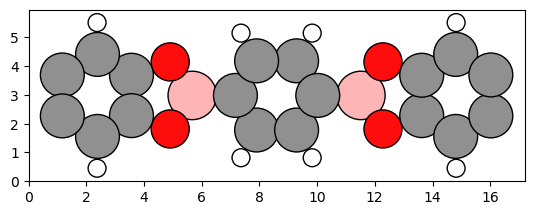

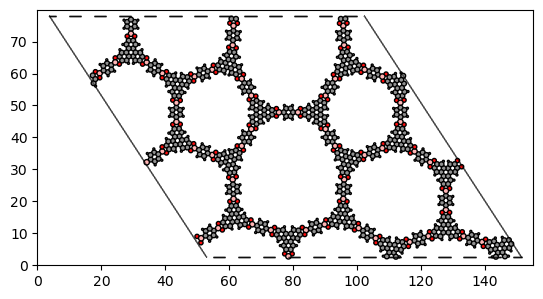

In [3]:
linkermol = read('linkermol_only.xyz')
plot_atoms(linkermol)
plt.show()
redecorated = redecorate_cg_atoms(cg_atoms,
                                    core_atoms=None,
                                    linker_atoms=linkermol,
                                    linkage_length=1.2445)
redecorated.write('redecorated_linkermol.cif')
plot_atoms(redecorated)
plt.show()

## Option 2: With corenol and linkermol

Here, we have additionally a molecular building block in the core-region. This core molecule will be placed in the center of the core region and rotated accordingly. Then the linker building block will be placed.

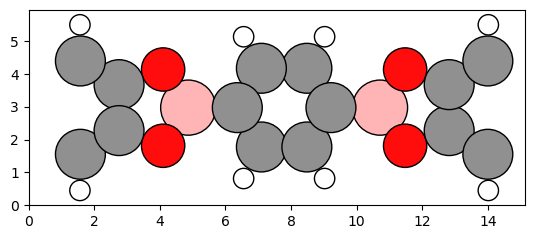

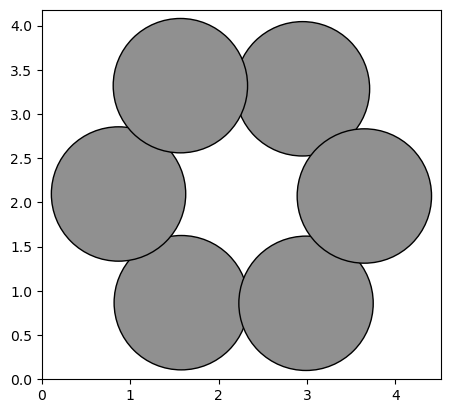

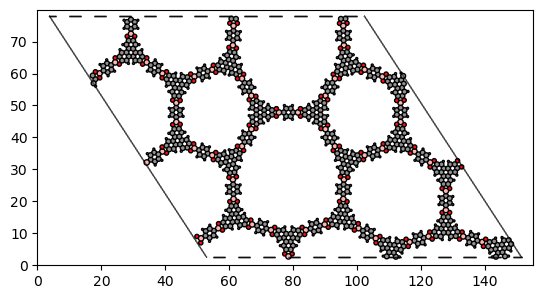

In [4]:
linkermol = read('linkermol.xyz')
plot_atoms(linkermol)
plt.show()
coremol = read('coremol.xyz')
plot_atoms(coremol)
plt.show()

redecorated = redecorate_cg_atoms(cg_atoms,
                                    core_atoms=coremol,
                                    linker_atoms=linkermol,
                                    linkage_length=1.2445+1.219)
redecorated.write('redecorated_linkermol_coremol.cif')
plot_atoms(redecorated)
plt.show()